# 📘 Based on the Book: Practical Statistics for Data Scientists
## 🔍 Overview
Python Implementation of Mean Median (Trimmed, Weighted etc).

## 🛠️ Setup
Pandas.

## 📊 Data
Available in below GitHub Repo:
https://github.com/gedeck/practical-statistics-for-data-scientists/blob/master/data/state.csv


In [1]:
import pandas as pd

In [16]:
from scipy import stats

In [19]:
import numpy as np

In [30]:
from statsmodels import robust

In [7]:
df=pd.read_csv('./Data/state.csv')

In [8]:
df.head(5)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


#### Measure of Central Tendancy

In [11]:
# 1. Mean Population across states
print(df['Population'].mean())

6162876.3


In [12]:
# 2. Median Population across states {Robust to Outliers}
print(df['Population'].median())

4436369.5


In [18]:
# 3. Trimmed Mean Population across states
print(stats.trim_mean(df['Population'],0.1))

4783697.125


In [20]:
# 4. Weighted Mean Population across states
print(np.average(df['Murder.Rate'],weights=df['Population']))

4.445833981123393


#### Measure of Variability

In [21]:
# 1. Standard Deviation
print(df['Population'].std())

6848235.347401142


In [22]:
# 2 IQR (75th percentile - 25th percentile) {Robust to Outliers}
print(df['Population'].quantile(0.75)-df['Population'].quantile(0.25))

4847308.0


In [32]:
# 3 Median Absolute Deviation {Robust to Outliers}
print(robust.scale.mad(df['Population']))

3849876.1459979336


#### Exploring the Distributions

In [33]:
# 1 Box Plot and Percentiles
df['Murder.Rate'].quantile([0.05,0.10,0.25,0.50,0.75,0.95])

0.05    1.600
0.10    1.890
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

<Axes: >

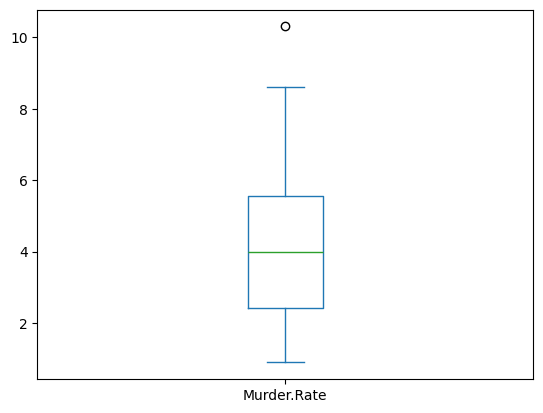

In [38]:
df['Murder.Rate'].plot.box()

<Axes: >

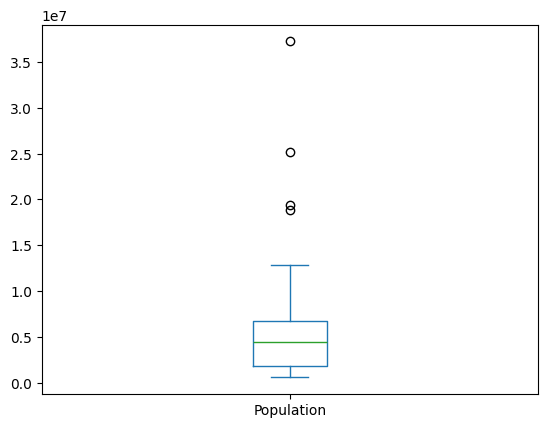

In [39]:
df['Population'].plot.box()

In [41]:
# 2 Histograms
binned_pop=pd.cut(df['Population'],11)
binned_pop.value_counts()

Population
(526935.67, 3899110.545]        24
(3899110.545, 7234595.091]      14
(7234595.091, 10570079.636]      5
(10570079.636, 13905564.182]     3
(17241048.727, 20576533.273]     2
(33918471.455, 37253956.0]       1
(23912017.818, 27247502.364]     1
(20576533.273, 23912017.818]     0
(13905564.182, 17241048.727]     0
(27247502.364, 30582986.909]     0
(30582986.909, 33918471.455]     0
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

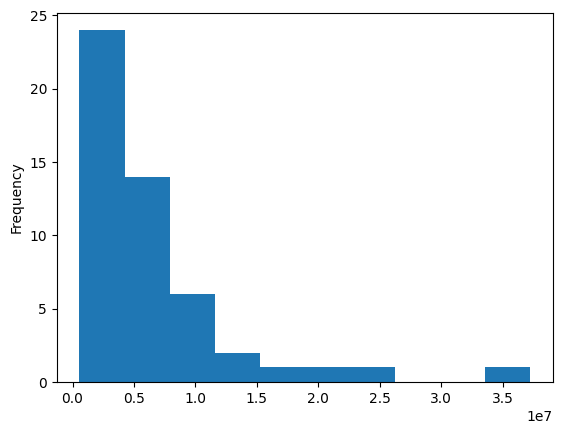

In [42]:
df['Population'].plot.hist()

```sql
Pro Tip:

    Both Percentile and Frequency table creates Bins, however 
    Percentile = Equal count with variable Range
    Frequency table = Different counts with Equal Range

```

<Axes: ylabel='Density'>

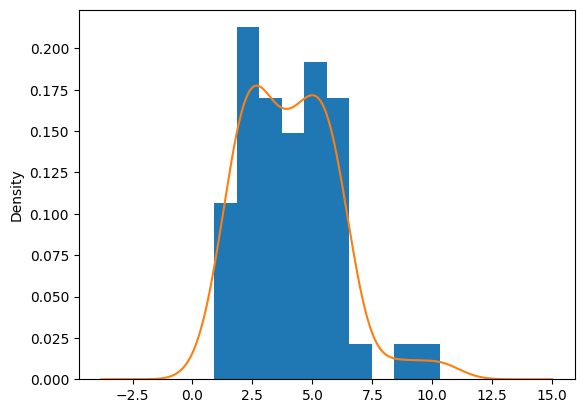

In [47]:
# 3 Density Plot (Total Area Under this plot is 1, histogram is proportion rather than count)
df['Murder.Rate'].plot.hist(density=True)
df['Murder.Rate'].plot.density()